Pre-processing is the concept of standardizing our model development dataset. This is applied in situations where we have differences in the magnitude of numeric features and situations where we have categorical and continuous variables.The goal of the preprocessing work is to prepare our data for fitting models.

general steps in pre-processing and training data development:

**1-Create dummy or indicator features for categorical variables**

**2-Scaling Features**

**3-Split into testing and training datasets**


In [61]:
# data manipulation and math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

**1.-Loading the Data**

As a first step, read in the data and view all the columns, and display the top of the DataFrame.

In [62]:
# load the data
aa_no_pm= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_no_pm_cleaned.csv')
df= aa_no_pm.copy()
print('The data have ',df.shape[0], 'rows and',df.shape[1],'columns')

print('Columns name: \n')
print('\n'.join(list(df.columns)))

The data have  347 rows and 7 columns
Columns name: 

Year
GeoType
GeoID
Number
no2/Mean ppb
Geography
pm/Mean mcg/m3


In [63]:
df.head()

,Year,GeoType,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3
0,2020,CD,101,80.0,21.7,Financial District (CD1),7.5
1,2020,CD,102,81.0,21.3,Greenwich Village and Soho (CD2),8.5
2,2020,CD,103,661.0,19.4,Lower East Side and Chinatown (CD3),7.5
3,2020,CD,104,364.0,22.5,Clinton and Chelsea (CD4),8.0
4,2020,CD,105,116.0,26.3,Midtown (CD5),9.2


**2.Transformation of categorical features**

In general, categorical features need to be transformed or encoded to be used in some machine learning models.In this project the only column 'GeoType' must be encoded.We are not going to use the other ones in the model.

In [64]:
# Transform categorical columns 

df_transformed= pd.get_dummies(df,columns=['GeoType'])


In [65]:
df_transformed.head()

,Year,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,101,80.0,21.7,Financial District (CD1),7.5,False,True,False,False
1,2020,102,81.0,21.3,Greenwich Village and Soho (CD2),8.5,False,True,False,False
2,2020,103,661.0,19.4,Lower East Side and Chinatown (CD3),7.5,False,True,False,False
3,2020,104,364.0,22.5,Clinton and Chelsea (CD4),8.0,False,True,False,False
4,2020,105,116.0,26.3,Midtown (CD5),9.2,False,True,False,False


In [66]:
# Drop irrelevant columns
df_transformed=df_transformed.drop(columns=['GeoID','Geography'],axis=1)

In [67]:
df_transformed

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,80.0,21.7,7.5,False,True,False,False
1,2020,81.0,21.3,8.5,False,True,False,False
2,2020,661.0,19.4,7.5,False,True,False,False
3,2020,364.0,22.5,8.0,False,True,False,False
4,2020,116.0,26.3,9.2,False,True,False,False
...,...,...,...,...,...,...,...,...
342,2009,20450.0,24.1,10.5,True,False,False,False
343,2009,14493.0,33.9,12.6,True,False,False,False
344,2009,10602.0,22.2,10.0,True,False,False,False
345,2009,2843.0,16.8,9.8,True,False,False,False


**3.Split into testing and training datasets**


In [68]:
#Separate the features and the target variable
X=df_transformed.drop(columns=['Number'])
y=df_transformed['Number']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (277, 7)
x_test shape: (70, 7)
y_train shape: (277,)
y_test shape: (70,)


**4.-Scaling Features**

Apply normalization and standardization on our data to compare the effects of different Feature scaling techniques on the algorithm’s performance then evaluate the performance of our model using RMSE.

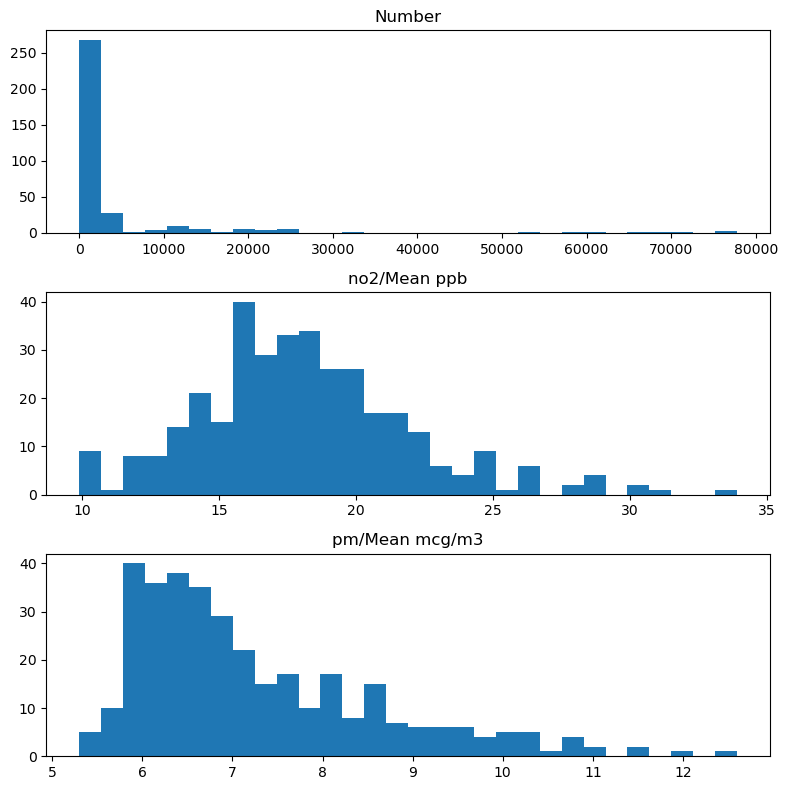

In [69]:
# Making a histogram for each variable in df

columns=['Number','no2/Mean ppb','pm/Mean mcg/m3']

# Create a figure with three subplots
fig,axs= plt.subplots(3,1,figsize=(8, 8))

# Plot histograms for each column
for i,col in enumerate(columns):
    axs[i].hist(df_transformed[col],bins=30)
    axs[i].set_title(col)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

* The histogram shows that the Number column is highly skewed with many outliers. The values range from small to very large, with a significant number of very high values. 

* The no2/Mean ppb column seems to have a relatively normal distribution but is slightly skewed. 

* The pm/Mean mcg/m3 column appears to be skewed to the right. 

**4.1.Apply Scaling**

We supposed to apply scaling on different models on our data. Models includes:
- Linear Regression
- Ridge Regression
- Gradient Boosting
- Random Forest
- SVR

The random forest model, which utilizes tree-based algorithms, is fairly insensitive to the scale of the features. Therefore, we do not apply scaling to this model for comparison purposes.

In [70]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['pm/Mean mcg/m3','no2/Mean ppb']

# apply standardization on numerical features
for i in num_cols:
    stand= StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = stand.transform(X_train_stand[[i]])
    X_test_stand[i] = stand.transform(X_test_stand[[i]])


In [71]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# Apply Normalization on numerical features

for i in num_cols:
    norm=  MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train[[i]])
    X_test_norm[i] = norm.transform(X_test[[i]])


**4.2.Applying Scaling to Machine Learning Algorithms**

**4.2.1.Linear Regression**


In [72]:
rmse=[]

lr=LinearRegression()

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE

for i in range(len(trainX)):
    lr.fit(trainX[i],y_train)
    y_pred= lr.predict(testX[i])
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
# visualizing the result
df_lr= pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_lr
    

,RMSE
Original,3171.675538
Normalized,3171.675538
Standardized,3171.675538


Based on the results of RMSE, for linear regression RMSE scores has not changed.

**4.2.2.Ridge Regression**

In [73]:
rmse_rg=[]

ridge=Ridge(alpha=1.0)

# model fitting and measuring RMSE
for i in range(len(trainX)):
    ridge.fit(trainX[i],y_train)
    y_pred_rd=ridge.predict(testX[i])
    rmse_rg.append(np.sqrt(mean_squared_error(y_test,y_pred_rd)))
    
    
 # visualizing the result
df_rg= pd.DataFrame({'RMSE':rmse_rg},index=['Original','Normalized','Standardized'])
df_rg   

,RMSE
Original,3362.293971
Normalized,3378.933703
Standardized,3362.817910


Based on the results of RMSE, we can see that scaling the features does not reduce the RMSE score. The standardized data performed the same as the original data.

**4.2.3.Gradient Boosting**

In [74]:
rmse_gb=[]
gb= GradientBoostingRegressor()

# model fitting and measuring RMSE
for i in range(len(trainX)):
    gb.fit(trainX[i],y_train)
    y_pred_gb=ridge.predict(testX[i])
    rmse_gb.append(np.sqrt(mean_squared_error(y_test,y_pred_gb)))
    
    
 # visualizing the result
df_gb= pd.DataFrame({'RMSE':rmse_gb},index=['Original','Normalized','Standardized'])
df_gb   


,RMSE
Original,14154.039149
Normalized,3307.169813
Standardized,3362.817910


We can see that scaling the features does bring down the RMSE score. And the **Normalized data** has performed better than the Standardized data.

**4.2.4.Support Vector Regression Model (SVR)**

In [75]:
rmse_svr=[]

svr= SVR()

# model fitting and measuring RMSE
for i in range(len(trainX)):
    svr.fit(trainX[i],y_train)
    y_pred_svr=ridge.predict(testX[i])
    rmse_svr.append(np.sqrt(mean_squared_error(y_test,y_pred_svr)))
    
    
 # visualizing the result
df_svr= pd.DataFrame({'RMSE':rmse_svr},index=['Original','Normalized','Standardized'])
df_svr   

,RMSE
Original,14154.039149
Normalized,3307.169813
Standardized,3362.817910


We can see that scaling the features does bring down the RMSE score. And the **Normalized data** has performed better than the Standardized data.
Therefore we can choose **Normalization** as a scaling method for our data.

**5.Save Data**

In [76]:
# save the data to a new csv file
# Path to the directory where you want to save the file
data_path = '../data'
# Create the directory if it does not exist
os.makedirs(data_path, exist_ok=True)

#save the dataframe to a CSV file in the new directory
df_transformed.to_csv(os.path.join(data_path, 'aa_transformed'), index=False)
